<a href="https://colab.research.google.com/github/JF11579/Colab/blob/main/Wantaugh_Network_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notes

### Try as they might Real Estate Brokerages have yet to find a way to get people to want to sell their homes before they are ready.  The next best thing to increase revenue that they have come up with  is to try to get the most succesful agents to work for them.  But this is not easily accomplished.

### Poaching a very succesful realtor.  It might be  easier to move Mount Everest.  Things  are going so spectuarly well for  them. Why should they take on the risk of switching firms?

### Here we suggest  an alternative strategy.  As will be demonstrated , the most succesful agent's listings are often  sold by a small coterie of agents and these agents are poachable.  And becasue of the difference in commisioon rates a brokerage can actually earn more by collecting this coterie than if they had the star listing agent in house. 

### It comes down what the commison rates, or the  *Splits*, of the commision paid to the Listing and Selling side of the deal.

### If a house sold for 100,000 dollars  and and the commision were 4% often the Listing brokerage would get 2000 dollars and the selling side side would get the other 2000 dollars.

### These two 2000 dollars fees are then split between the Agent and the Brokerage.  A star agent might be on a 75% split, they would get 75% of the $2000 paid to their side i.e., 1500 dollars while their firm would only recieve the remianing 500 dollars.

### Meanwhile on the Selling side, that agent is on a 50% split so they woudld recieve 1000 dollars and so would  the Brokerage.

### It is not  that  the  Listing agency has to sell two house to earn as much as the Selling side. It is  that the Star agent is not poachable to begin with and our system helps one identify agents who might be poachable to  replicate having the star agent in house.

## Libraries

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns

## Options

In [ ]:
pd.set_option('display.max_columns', None)

# Data

In [ ]:
'''
W1 = pd.read_csv('/content/Wantaugh_17.csv')
W2 = pd.read_csv('/content/Wantaugh_18.csv')
W3 = pd.read_csv('/content/Wantaugh_19.csv')
W4 = pd.read_csv('/content/Wantaugh_20_1.csv')
W5 = pd.read_csv('/content/Wantaugh_20_2.csv')
W6 = pd.read_csv('/content/Wantaugh_21_1.csv')
W7 = pd.read_csv('/content/Wantaugh_21_2.csv')
W8 = pd.read_csv('/content/Wantaugh_2022.csv')
'''

"\nW1 = pd.read_csv('/content/Wantaugh_17.csv')\nW2 = pd.read_csv('/content/Wantaugh_18.csv')\nW3 = pd.read_csv('/content/Wantaugh_19.csv')\nW4 = pd.read_csv('/content/Wantaugh_20_1.csv')\nW5 = pd.read_csv('/content/Wantaugh_20_2.csv')\nW6 = pd.read_csv('/content/Wantaugh_21_1.csv')\nW7 = pd.read_csv('/content/Wantaugh_21_2.csv')\nW8 = pd.read_csv('/content/Wantaugh_2022.csv')\n"

In [ ]:
# df = pd.concat([W1 ,W2 , W3 ,W4, W5 ,W6 ,W7 ,W8] , ignore_index= True, axis = 0)

In [ ]:
df = pd.read_csv('/content/Wantaugh_compiled.csv')

In [ ]:
df.head(2)

,Unnamed: 0,Air Conditioning,Acres,Property Description,Address,Agency,Also For Rent,Interior Features,Apt#,Attic Description,Auxiliary Rooms,Baths Full,Baths Half,Buyer Agency Compensation,Waterfront Features,Building,Building Permit,Block,Listing Broker Phone #,Bedrooms,Branch,Modifications Exclusions,Basement Description,Room Level,Bath,Business Age,Business Type,Utilities Included,Included,Cash Down,Contract Cancel Effective Date,Contract Date,Under Steel,Available Utilities,Class Description,Co-Listing Agent,Co-Listing Agent2,Broker Code,Common Charges,Commission Oblig Date,Compensation Paid By,Compass Points,Appearance,W/R Conditions,Construction Description,Lot Description,County,Contract Price,Cross Street,Location Features,DBA,Exterior Features,Deductible %,Income Desc 1,Income Desc 2,Income Desc 3,Income Desc 4,Income Desc 5,Income Desc 6,Income Desc 7,Income Desc 8,Detached/Attached,Development,District,Days On Market,Driveway,Fees,Finance Restrictions,Final Mortgage,Fixtures & Equipment,Floor Load,REO,# Fireplaces,Frontage Feet,Feet From Corner,Heating Fuel,Parking,LandLord Pays,Gross Profit %,Building Features,Heating Type,Hilp$,Inc 1 $,Inc 2 $,Inc 3 $,Inc 4 $,Inc 5 $,Inc 6 $,Inc 7 $,Inc 8 $,Inventory Included,Insurance,Distribute To Internet Portals,Inventory,Listing Date,Lease,Topography,Listing Agent,Number of Docks,Lockbox,Lolp$,Lot,Lot Square Footage,Lot Size,Listing Price,Last Status Change,Lease Years,Last Update Date,Maintenance,Maintenance/Repairs Expense,Minimum Plot Size,Miscellaneous Expense,ML#,Model Name,Moved From,Mortgage Type,Negotiate Direct,Net Income,New Construction,# Families,# Floors In Building,# Floors In Unit,# Kitchens,# Plots,# Units,# Heating Zones,Occupancy,Office %,Broker Open House Description,Broker Open Houses,Lease Conditions,Original Price,Other Fees,Out of Area Town,Owner,Owner Financing,Parking Charges,Parking Facilities,Parking Spaces,Parking Spaces At Building,Payroll Expense,% Difference,Permit,Personal Property Exclusion,Pets Allowed,Status/Showing Phone,Planning Board Approved,Pool Description,Possible Subdivision,Price Range Listing,Property Type,Proposed Title Date,Purchaser,Renting Broker Branch,Renting Broker Code,Renting Broker Compensation,Rented Date,Road Surface,Remarks,Rent Expense,Renting Agent,Rent Income,Rent Per Square Foot,Rental Type,Relist Obligation Date,Listing Broker,Rooms,Rented Price,Renting Broker,Sale or Rent,Selling Broker Branch,Selling Broker Code,Seller Agency Compensation,School District Name,School District #,Seats,Section,Section/Area,Security Deposit,Selling Agent,Separate Hotwater Heater,Show Instructions,Sold Price,Approx Int Square Footage,Selling Broker,Street Name,Street Direction,Street Number,Street Suffix,Status,State,Stories,Style,Supercedes ML#,Taxes,Taxes W/Star Exemption,Title Date,TOM,Terms,TOM Start Date,TOM End Date,Total Expenses,Total Income,Town,Type Ownership,Type Sale,Unit #,Unit on Floor #,Vacancy %,Development Status,Village Taxes,Water Frontage,Water Description,Wooded/Cleared,Withdrawn/Release Date,Exp Date,Year Built,Zip,Zone,Zoning
0,0,Yes,NaN,NaN,20 Marlboro Place,NaN,N,"Lr/Dr,1st Fl Master Bedroom",NaN,See Remarks,NaN,1,0,0,NaN,NaN,NaN,276,516-354-0500,2,2,NaN,"Full,Finished",1,1.0,NaN,NaN,NaN,"Dishwasher,Refrigerator",NaN,NaN,5/25/2017,NaN,Sewer,Single Family,NaN,NaN,ANDN,NaN,NaN,NaN,NaN,Mint,NaN,Frame,NaN,N,358000.0,Wilson Place,NaN,NaN,"Patio,Sprinkler Lawn Sys",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Det,NaN,NaN,28,Pvt,NaN,NaN,NaN,NaN,NaN,N,0.0,NaN,NaN,Natural Gas,1 Car Detached,NaN,NaN,NaN,Hot Water,379000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/27/2017,NaN,NaN,Christopher Andron,NaN,N,379000,110,5000,50X100,379000,CL,NaN,7/26/2017,NaN,NaN,NaN,NaN,*1282871,NaN,Ny,Conv,N,NaN,N,1,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,379000,NaN,NaN,Pickett,NaN,NaN,NaN,NaN,NaN,NaN,5.5,NaN,NaN,NaN,516-354-0500,NaN,NaN,NaN,N,NaN,NaN,Arauz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andron Realty Group Tulip R E,5.0

In [ ]:
df.shape

(2910, 220)

## Lets make sure we dont have any duplicate deals

In [ ]:
df= df.drop_duplicates(subset= 'ML#' , keep = 'first')

In [ ]:
df.shape #good thing we checked

(2782, 220)

## We are only intersted in two columns

In [ ]:
df = df[['Listing Agent' , 'Selling Agent']]

## Those empty spaces inteh names could be problematic

In [ ]:
df = df.rename(columns = {'Listing Agent':'ListingAgent' , 'Selling Agent':'SellingAgent'})

# Since we are only intersted in the most productive teams we will eliminate andy Self Deals where Listing Agent is also the Selling Agent.

In [ ]:
df = df[df['SellingAgent'] != df['ListingAgent']]

In [ ]:
df.shape

(2371, 2)

In [ ]:
df.head()

,ListingAgent,SellingAgent
1,Peter J Frizalone,Diane Eichhorn
2,Claudia A Massari,Laura Dupkin Memisha
3,Laura Dupkin Memisha,Jill Abby Proct
6,Laura Dupkin Memisha,Jill Abby Proct
7,Brian Dowling,George O Duquette


In [ ]:
EachPair = df.value_counts().to_frame('counts').reset_index()

In [ ]:
EachPair.head(3)

,ListingAgent,SellingAgent,counts
0,Laura Dupkin Memisha,Caterina L Ambrosio,8
1,Laura Dupkin Memisha,Nancy Kalberer,5
2,Michael J Kenduck,Steven Cymbrowitz,5


In [ ]:
TreeData = EachPair.groupby('ListingAgent')['counts'].count().sort_values(ascending=False)
TreeData.to_frame()
TreeData = TreeData.reset_index()

In [ ]:
TreeData.head(3)

,ListingAgent,counts
0,Laura Dupkin Memisha,110
1,Lisa A Camarda,36
2,Athena Tina Canaris,35


## Now we have 3 datasets


1.   df:       every transaction
2.   TreeData: a count of every listing per agent
3.   EachPair: a count of how many transactions each team had







## Analyses

## How much more succesful are some agents?


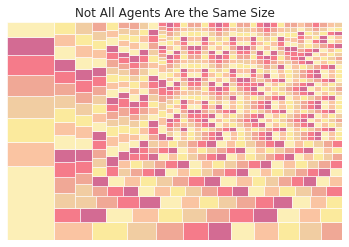

In [ ]:


colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
#sizes = (20,15)

sns.set_style(style="whitegrid") # set seaborn plot style
sizes= TreeData["counts"].values# proportions of the categories
label= TreeData["ListingAgent"]
#squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Treemap with Squarify')
squarify.plot(sizes=sizes, alpha=0.6,color=colors).set(title='Not All Agents Are the Same Size')
plt.axis('off')
plt.show()

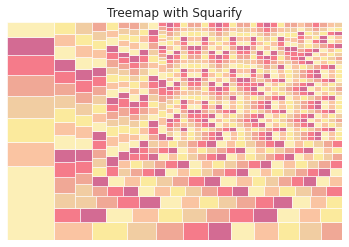

In [ ]:
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

sns.set_style(style="whitegrid") # set seaborn plot style
sizes= TreeData["counts"].values# proportions of the categories
#label=df["ListingAgent"]
#squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Treemap with Squarify')
squarify.plot(sizes=sizes, alpha=0.6,color=colors).set(title='Treemap with Squarify')
plt.axis('off')
plt.show()

## Every transaction in Bellmore, Wantaugh, and Massapeaqua (all NYS) between 2017 throough October 2022

In [ ]:
df.head()

,ListingAgent,counts
0,Laura Dupkin Memisha,110
1,Lisa A Camarda,36
2,Athena Tina Canaris,35
3,Seth B Levy,33
4,Tony Smith,31


Text(0.5, 1.0, 'No Trees, All Forest')

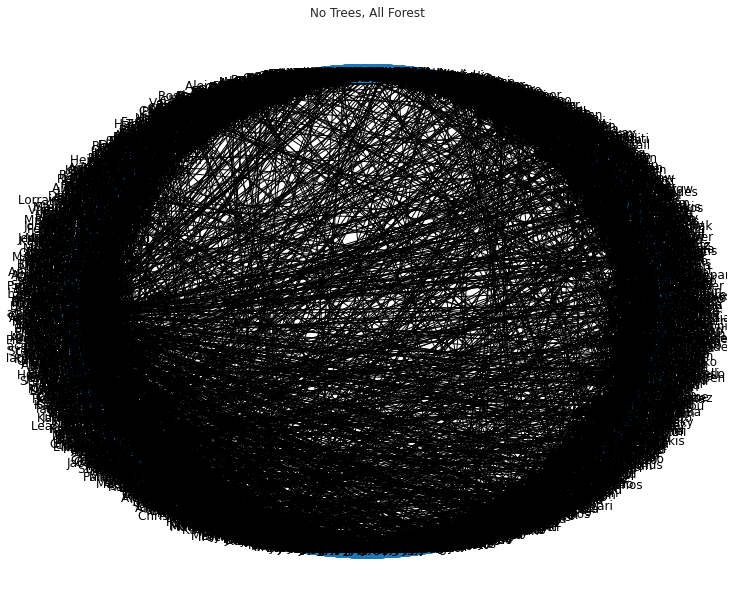

In [ ]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'ListingAgent' , 'SellingAgent')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)
plt.title('No Trees, All Forest' )

## Instead of showing every single transaction let us group them by pairs where each pair of agents is shown one time regardless of how many deals they did together.

In [ ]:
#EachPair = df.value_counts().to_frame('counts').reset_index()

In [ ]:
EachPair.head(3)

,ListingAgent,SellingAgent,counts
0,Laura Dupkin Memisha,Caterina L Ambrosio,8
1,Laura Dupkin Memisha,Nancy Kalberer,5
2,Michael J Kenduck,Steven Cymbrowitz,5


Text(0.5, 1.0, 'All Trees , No Forest, All Forest')

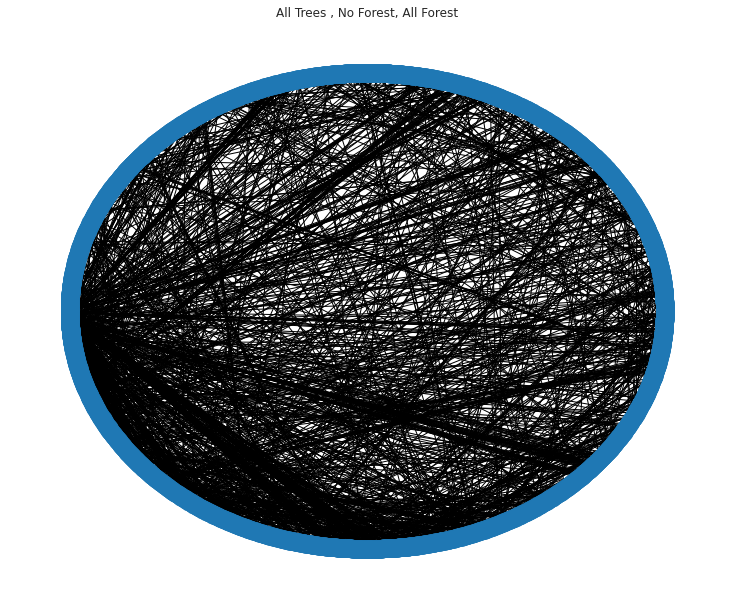

In [ ]:
data = EachPair

G = nx.Graph()
G = nx.from_pandas_edgelist(data, 'ListingAgent' , 'SellingAgent')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=False)
plt.title('All Trees , No Forest' )

## Let us screen out teams that have done less than 3 deals

In [ ]:

BigAgents = EachPair[EachPair.counts > 2]

In [ ]:
BigAgents

,ListingAgent,SellingAgent,counts
0,Laura Dupkin Memisha,Caterina L Ambrosio,8
1,Laura Dupkin Memisha,Nancy Kalberer,5
2,Michael J Kenduck,Steven Cymbrowitz,5
3,Laura Dupkin Memisha,Claudia A Massari,4
4,Michael J Carroll,Christina L Kish,3
5,Athena Tina Canaris,Cindy DiBiasi,3
6,Laura Dupkin Memisha,Joanne Minkoff,3


Text(0.5, 1.0, 'All Trees , No Forest')

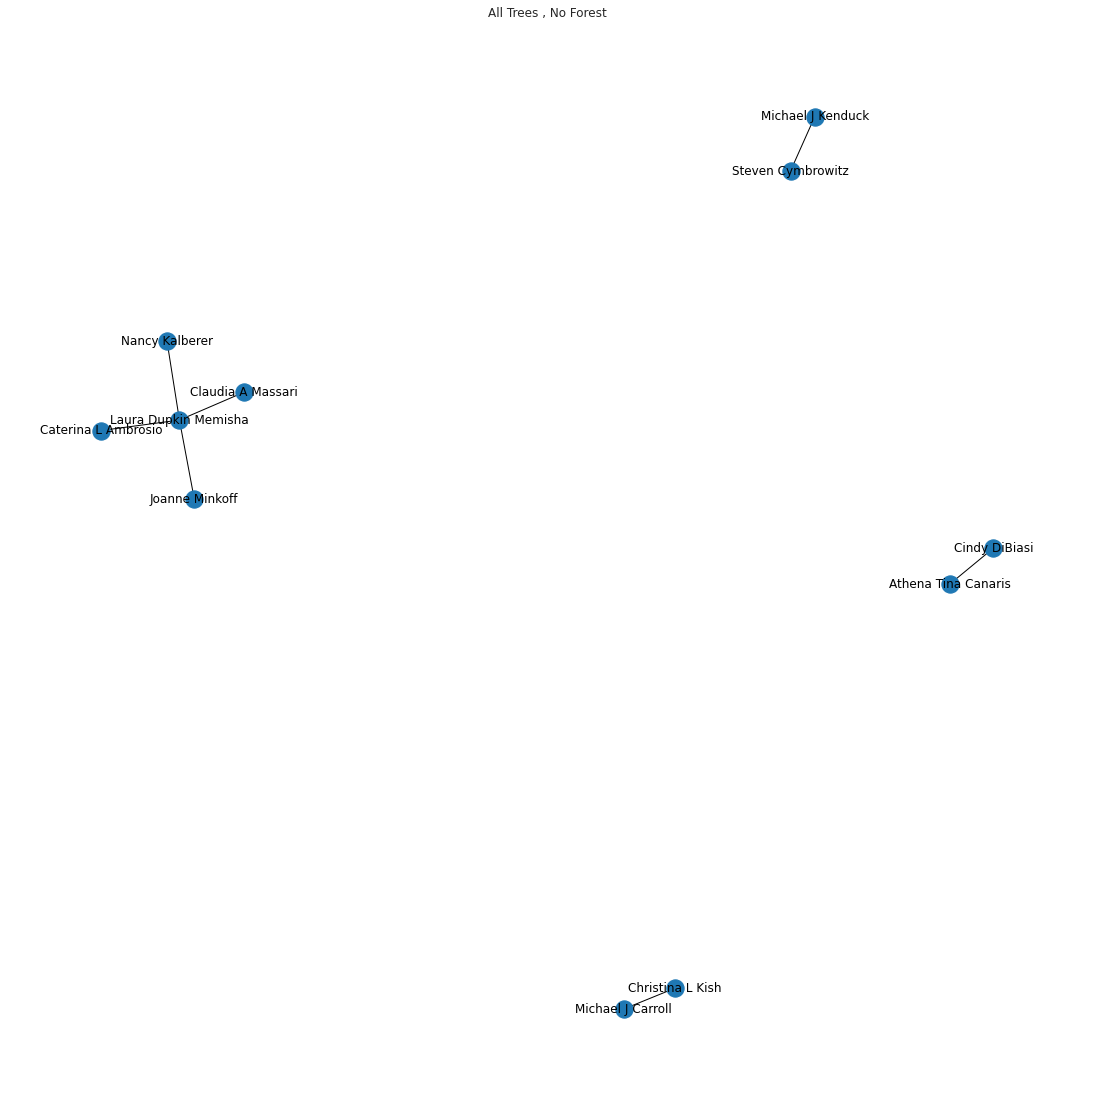

In [ ]:
data = BigAgents

G = nx.Graph()
G = nx.from_pandas_edgelist(data, 'ListingAgent' , 'SellingAgent')
from matplotlib.pyplot import figure
figure(figsize=(15, 15))
#nx.draw_shell(G, with_labels=True)
#nx.draw(G, with_labels=True , font_size = 12 ,font_weight = 'Bold')
nx.draw(G, with_labels=True , font_size = 12 )
plt.title('All Trees , No Forest' )


## Let us just look at Laura D Menisha with each deal shown.

## If things are going this well for Laura why would she ever move?  

## Here is every transaction of Laura Dupkin Memisha

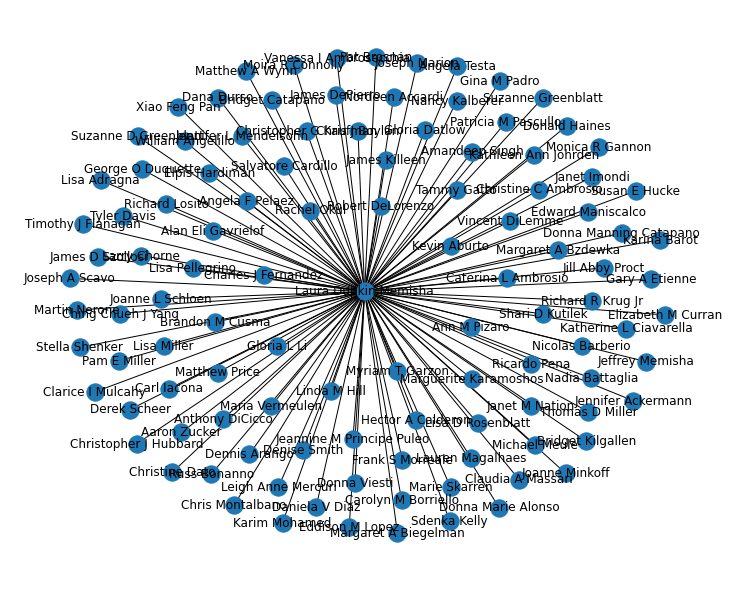

In [ ]:
LauraDupkinMemisha = df[df['ListingAgent'].isin(['Laura Dupkin Memisha'])]
data = LauraDupkinMemisha
G = nx.Graph()
G = nx.from_pandas_edgelist( data, 'ListingAgent' , 'SellingAgent')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)

## Here we bundle them so each Selling agent who sold more than two  displays once

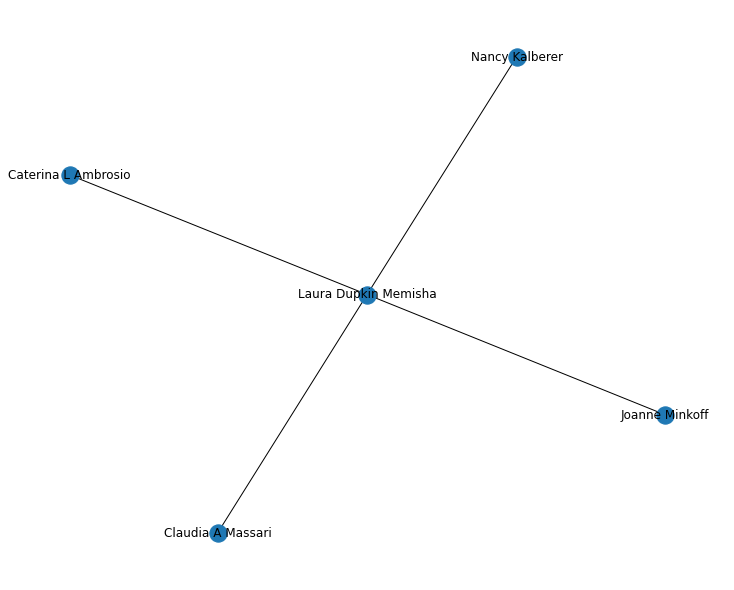

In [ ]:
LauraDupkinMemisha = BigAgents[BigAgents['ListingAgent'].isin(['Laura Dupkin Memisha'])]
data = LauraDupkinMemisha
G = nx.Graph()
G = nx.from_pandas_edgelist( data, 'ListingAgent' , 'SellingAgent')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)

Here we do the same for Michael_J_Kenduck, foirst we look at  all sales then we look at the repeating selling agents,

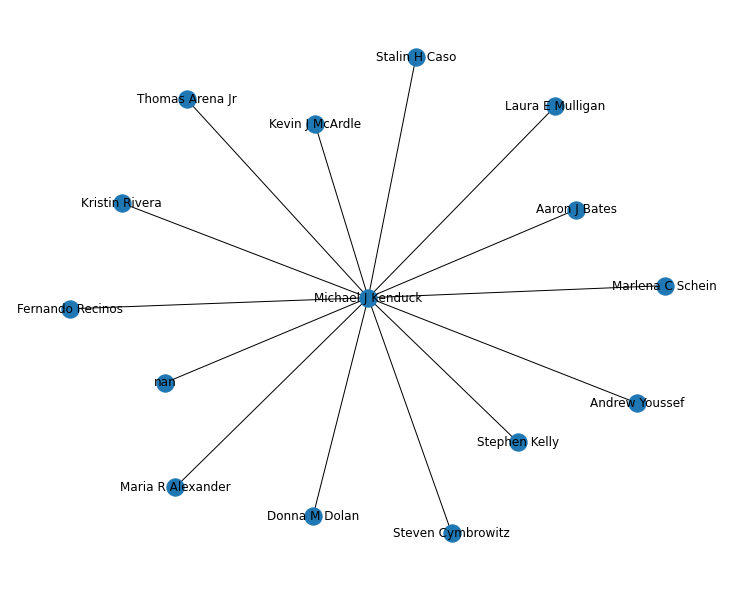

In [ ]:
Michael_J_Kenduck = df[df['ListingAgent'].isin(['Michael J Kenduck'])]
data = Michael_J_Kenduck
G = nx.Graph()
G = nx.from_pandas_edgelist( data, 'ListingAgent' , 'SellingAgent')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)

## Here is a good example .  While it migh not be possible to recruit Michael Kenduck it might be possible to replicate having him in your office by recruiting Steven Cymbrowitz.

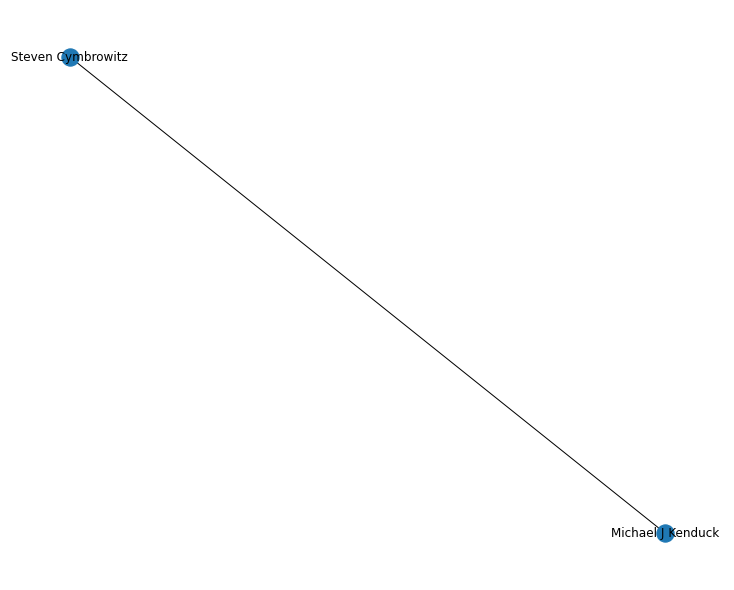

In [ ]:
Michael_J_Kenduck = BigAgents[BigAgents['ListingAgent'].isin(['Michael J Kenduck'])]
data = Michael_J_Kenduck
G = nx.Graph()
G = nx.from_pandas_edgelist( data, 'ListingAgent' , 'SellingAgent')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)